In [1]:
## Send hardest problems through LLMs

import random
import time
import itertools
import numpy as np
import os
import numpy as np
import json
from tqdm import tqdm
from pysat.solvers import Glucose42, Minicard, Lingeling, Cadical153, Minisat22,MapleChrono, Mergesat3
os.chdir('..')
print(os.getcwd()) # Should be ...\ExploringKSAT

from Code.generators import KSAT_Generator
from Code.solvers import brute_force, dpll
ksg = KSAT_Generator()
#ksg.kcnf_to_cnf(hardest_problem[1]]

C:\Users\shairozs\Documents\Projects\ExploringKSAT


In [2]:
ksg = KSAT_Generator()

folder = r'C:/Users/shairozs/Documents/Projects/ExploringKSAT/Data/CBS'
instances = [os.path.join(folder,x) for x in os.listdir(folder) if x.endswith('.cnf')]

In [3]:
_, k, literals, clauses, backbone, _, = os.path.split(instances[0])[-1].split('_')

In [4]:
ksg.cnf_score(ksg.from_dimacs_file(instances[0], 0))

7.995037220843672

In [5]:
from tqdm import tqdm
_glucose_times = []
_mc_times = []
_lg_times = []
backbone_size = []

operations = {"Backbone10":[], "Backbone30":[], "Backbone50":[], "Backbone70":[], "Backbone90":[]}

Xs = []
Ys = []

for instance in tqdm(instances, total = len(instances)):
    
    cnf = ksg.from_dimacs_file(instance, 0)
    score = ksg.cnf_score(cnf)
    _, k, literals, clauses, backbone, _, = os.path.split(instance)[-1].split('_')
    backbone = int(backbone.replace('b', "").replace("_", ""))

    solver = Glucose42()
    solver.append_formula(cnf)
    result = solver.solve()
    runtime = solver.accum_stats()['propagations']
    
    bkey = "Backbone" + str(backbone)
    operations[bkey].append(runtime)

    Xs.append(score)
    Ys.append(runtime)

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [02:41<00:00, 30.99it/s]


Text(0, 0.5, 'Median # of Variable Propagations \n 1000 Instances per Backbone Size')

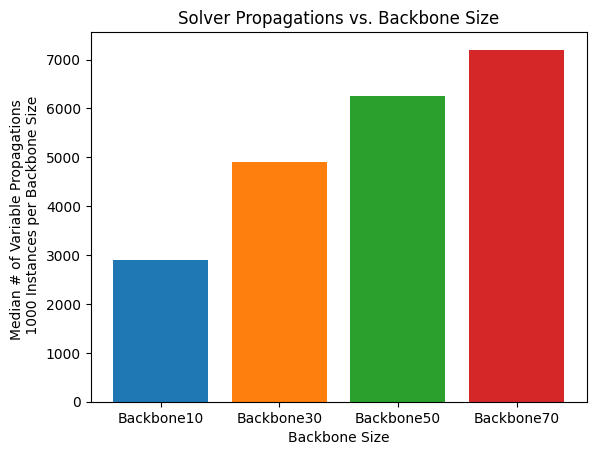

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.bar("Backbone10", np.median(operations["Backbone10"]))
plt.bar("Backbone30", np.median(operations["Backbone30"]))
plt.bar("Backbone50", np.median(operations["Backbone50"]))
plt.bar("Backbone70", np.median(operations["Backbone70"]))
plt.title("Median # of Variable Propagations \n 1000 Instances per Backbone Size - Glucose Solver")
plt.title("Solver Propagations vs. Backbone Size")
plt.xlabel("Backbone Size")
plt.ylabel("Median # of Variable Propagations \n 1000 Instances per Backbone Size")
#sns.kdeplot(operations["Backbone30"])
#sns.kdeplot(operations["Backbone50"])
#sns.kdeplot(operations["Backbone70"])
#sns.kdeplot(operations["Backbone90"])

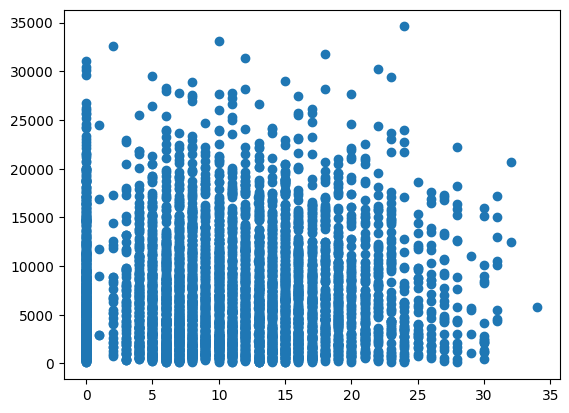

In [8]:
plt.scatter(Xs, Ys)